In [4]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("Copper_Set_Result.csv")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16851,68C637A0-0836-4C18-BEBB-BCA6757EAE05,20210312.0,25.058291,30205825.0,25.0,Won,S,10.0,1.50,1510.0,DX51D+ZM MAE,1.668702e+09,20210701.0,1006.00
16852,6BA19491-A382-4EBC-923B-713239EEC817,20210312.0,94.891116,30393641.0,39.0,Lost,W,10.0,6.80,1255.0,NaN,6.406650e+05,20210701.0,964.00
16853,536118F5-17B3-4130-B721-5BC4E34D3627,20210312.0,56.054345,30218705.0,25.0,Won,W,41.0,0.55,1240.0,0000000000000000000000000000000001006410,6.119930e+05,20210401.0,1119.00
16854,BB3004F9-DB04-47F3-BC56-649ADBC2A10A,20210312.0,92.689823,30393641.0,39.0,Lost,W,10.0,11.80,1080.0,NaN,6.406650e+05,20210701.0,964.00


In [6]:
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count}")
    data_types = df.dtypes


id: 16855
item_date: 20
quantity tons: 16855
customer: 615
country: 16
status: 8
item type: 6
application: 26
thickness: 361
width: 827
material_ref: 4079
product_ref: 26
delivery date: 19
selling_price: 1792


In [7]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date_1'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date_1'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df.head(3)
df.isnull().sum()

,0
id,1
item_date,1
quantity tons,1
customer,1
country,1
status,1
item type,1
application,1
thickness,1
width,1


In [8]:
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.head(3)
df.isnull().sum()

,0
id,1
item_date,1
quantity tons,1
customer,1
country,1
status,1
item type,1
application,1
thickness,1
width,1


In [9]:
df.drop(columns=['id','material_ref'], inplace=True)
df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,16855.0,2.021031e+07,2.005234e+03,1.995000e+07,2.021032e+07,2.021032e+07,2.021032e+07,2.021040e+07
quantity tons,16855.0,1.022338e+02,4.346836e+02,1.494114e-02,1.373273e+01,3.162418e+01,7.131576e+01,2.030029e+04
customer,16855.0,3.023653e+07,7.219113e+04,3.014772e+07,3.019726e+07,3.020582e+07,3.028116e+07,3.040772e+07
country,16855.0,4.298724e+01,2.332142e+01,2.500000e+01,2.600000e+01,2.800000e+01,7.700000e+01,1.130000e+02
application,16855.0,2.588312e+01,1.745988e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,16855.0,2.731753e+00,1.941709e+01,1.800000e-01,7.500000e-01,1.750000e+00,3.000000e+00,2.500000e+03
width,16855.0,1.303036e+03,2.453778e+02,1.000000e+00,1.178500e+03,1.250000e+03,1.500000e+03,2.150000e+03
product_ref,16855.0,5.187498e+08,7.406125e+08,6.117280e+05,6.283770e+05,6.406650e+05,1.668702e+09,1.721130e+09
delivery date,16855.0,2.021124e+07,7.779262e+04,2.019070e+07,2.021050e+07,2.021070e+07,2.021070e+07,3.031010e+07
selling_price,16855.0,6.912511e+03,7.702567e+05,-1.160000e+03,8.840000e+02,9.840000e+02,1.107515e+03,1.000009e+08


In [10]:
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T
df.isnull().sum()

,0
item_date,1
quantity tons,1
customer,1
country,1
status,1
item type,1
application,1
thickness,1
width,1
product_ref,1


In [11]:
df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace=True)
df['item_date_1'].fillna(df['item_date_1'].mode().iloc[0], inplace=True)
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0], inplace=True)
df['delivery date_1'].fillna(df['delivery date_1'].mode().iloc[0], inplace=True)

In [12]:
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [13]:
df.isnull().sum()
df['status'].unique()
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', nan], dtype=object)

In [14]:
df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4, 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,1,4.0,10.0,2.00,1500.0,1.670799e+09,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,1,4.0,41.0,0.80,1210.0,1.668702e+09,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,1,5.0,28.0,0.38,952.0,6.283770e+05,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1.668702e+09,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,1,4.0,10.0,4.00,2000.0,6.406650e+05,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16851,20210312.0,25.058291,30205825.0,25.0,1,3.0,10.0,1.50,1510.0,1.668702e+09,20210701.0,1006.00,2021-03-12,2021-07-01
16852,20210312.0,94.891116,30393641.0,39.0,0,4.0,10.0,6.80,1255.0,6.406650e+05,20210701.0,964.00,2021-03-12,2021-07-01
16853,20210312.0,56.054345,30218705.0,25.0,1,4.0,41.0,0.55,1240.0,6.119930e+05,20210401.0,1119.00,2021-03-12,2021-04-01
16854,20210312.0,92.689823,30393641.0,39.0,0,4.0,10.0,11.80,1080.0,6.406650e+05,20210701.0,964.00,2021-03-12,2021-07-01


In [15]:
df['item type'].unique()
df.isnull().sum()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,16856.0,2.021031e+07,2.005174e+03,1.995000e+07,2.021032e+07,2.021032e+07,2.021032e+07,2.021040e+07
quantity tons,16856.0,1.022296e+02,4.346711e+02,1.494114e-02,1.373290e+01,3.162418e+01,7.131267e+01,2.030029e+04
customer,16856.0,3.023652e+07,7.218938e+04,3.014772e+07,3.019726e+07,3.020582e+07,3.028116e+07,3.040772e+07
country,16856.0,4.298636e+01,2.332102e+01,2.500000e+01,2.600000e+01,2.800000e+01,7.700000e+01,1.130000e+02
status,16856.0,1.295622e+00,1.175492e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00
item type,16855.0,3.577870e+00,6.122414e-01,0.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00
application,16856.0,2.588248e+01,1.745957e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,16856.0,2.731695e+00,1.941651e+01,1.800000e-01,7.500000e-01,1.750000e+00,3.000000e+00,2.500000e+03
width,16855.0,1.303036e+03,2.453778e+02,1.000000e+00,1.178500e+03,1.250000e+03,1.500000e+03,2.150000e+03
product_ref,16855.0,5.187498e+08,7.406125e+08,6.117280e+05,6.283770e+05,6.406650e+05,1.668702e+09,1.721130e+09


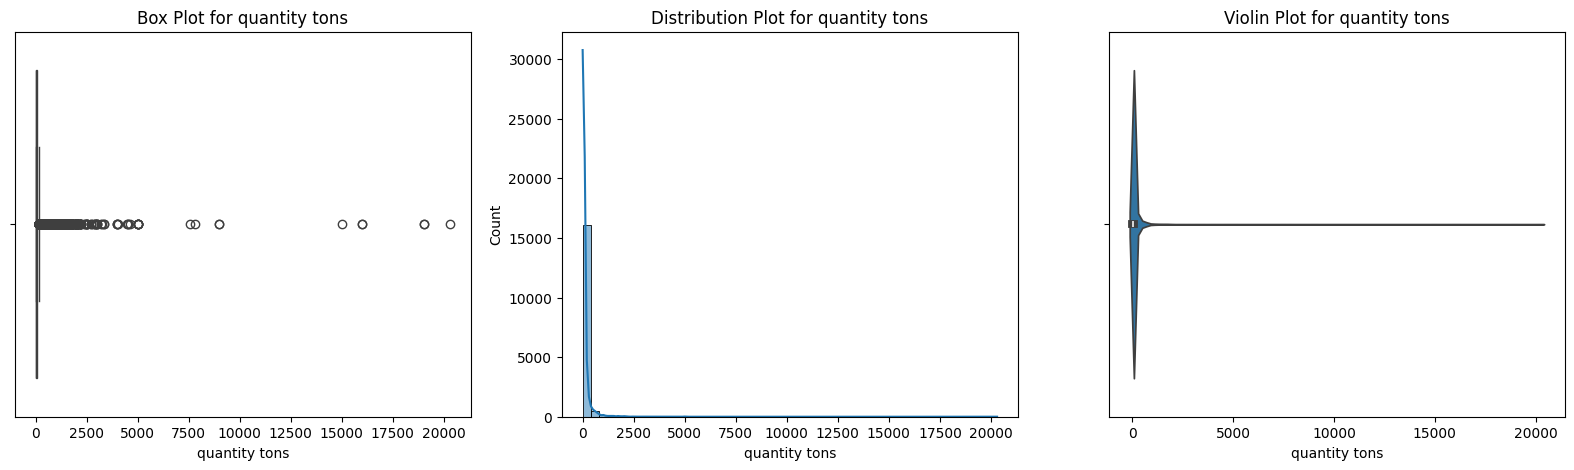

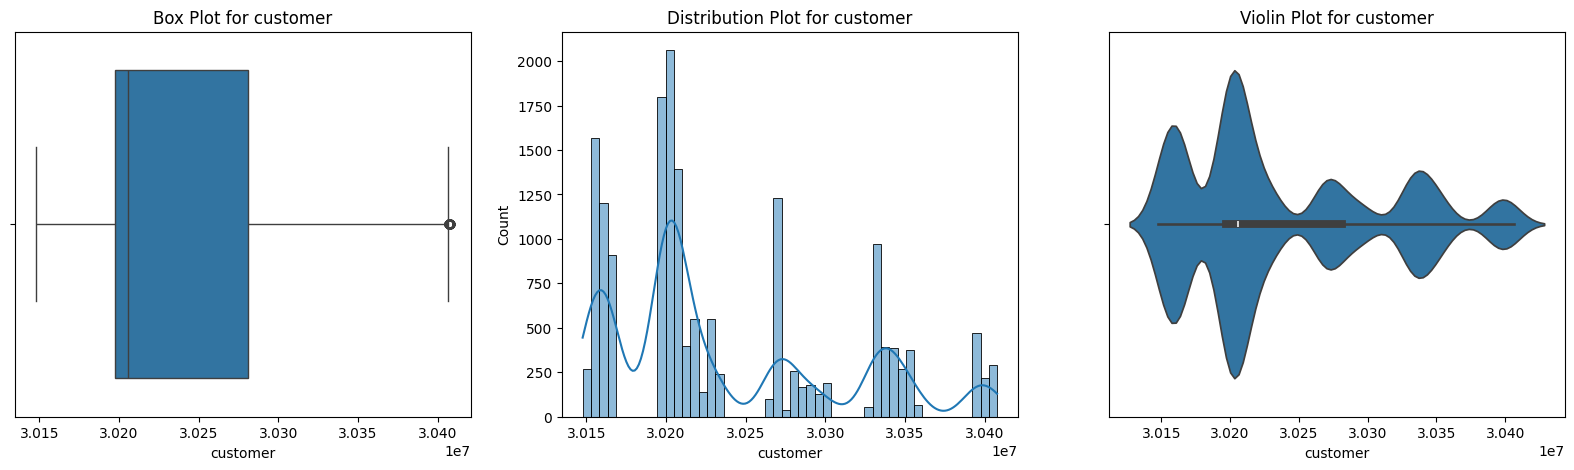

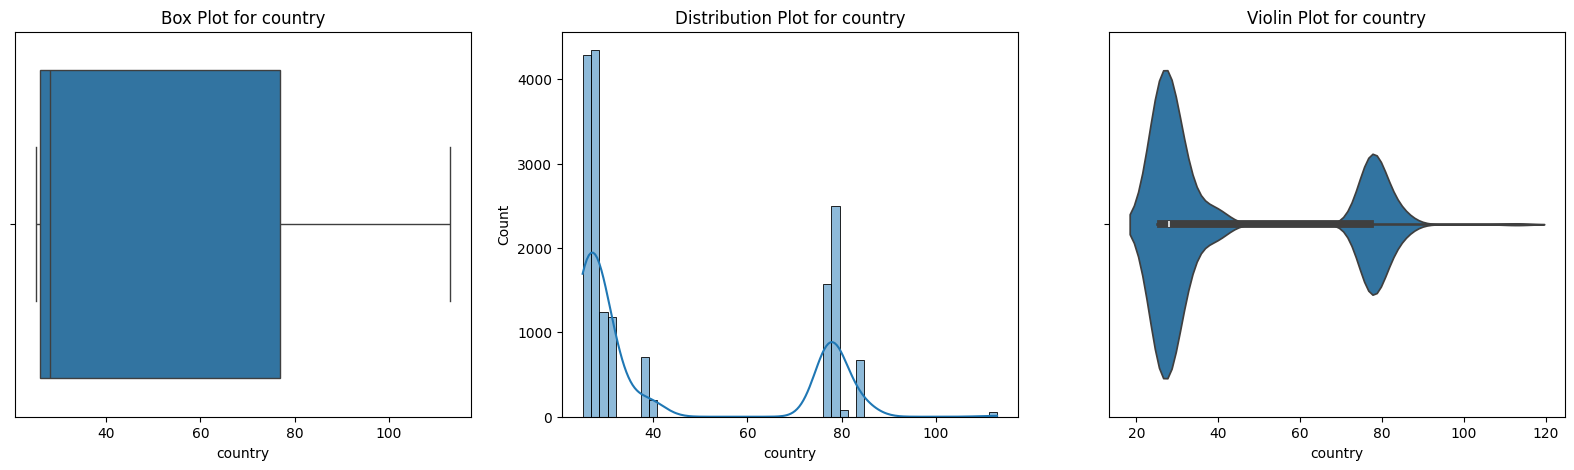

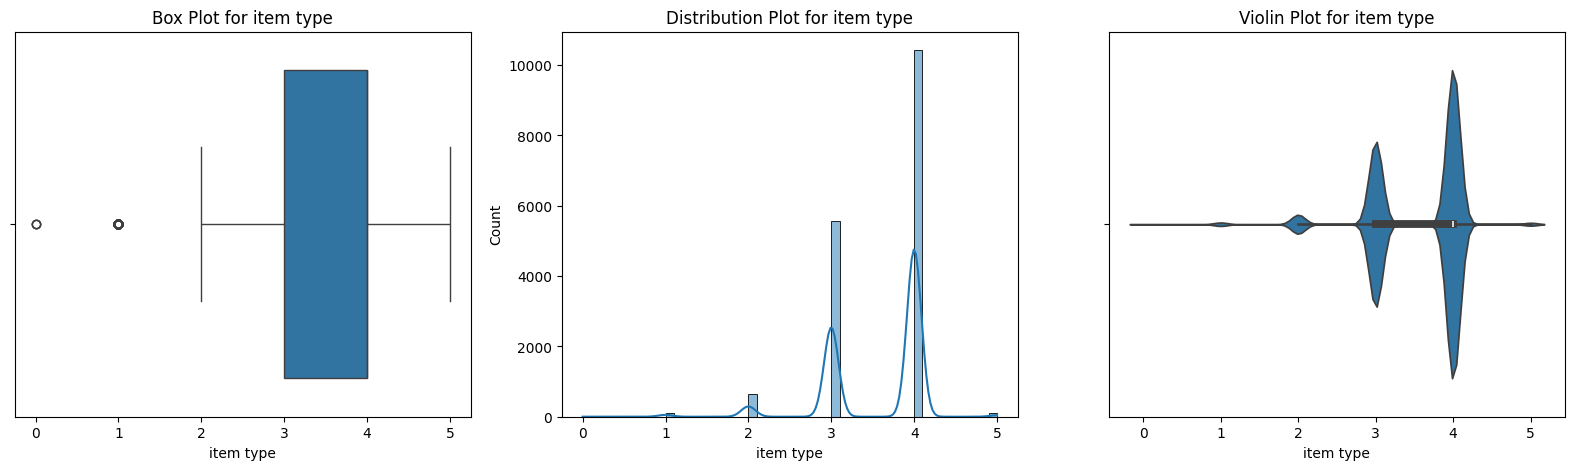

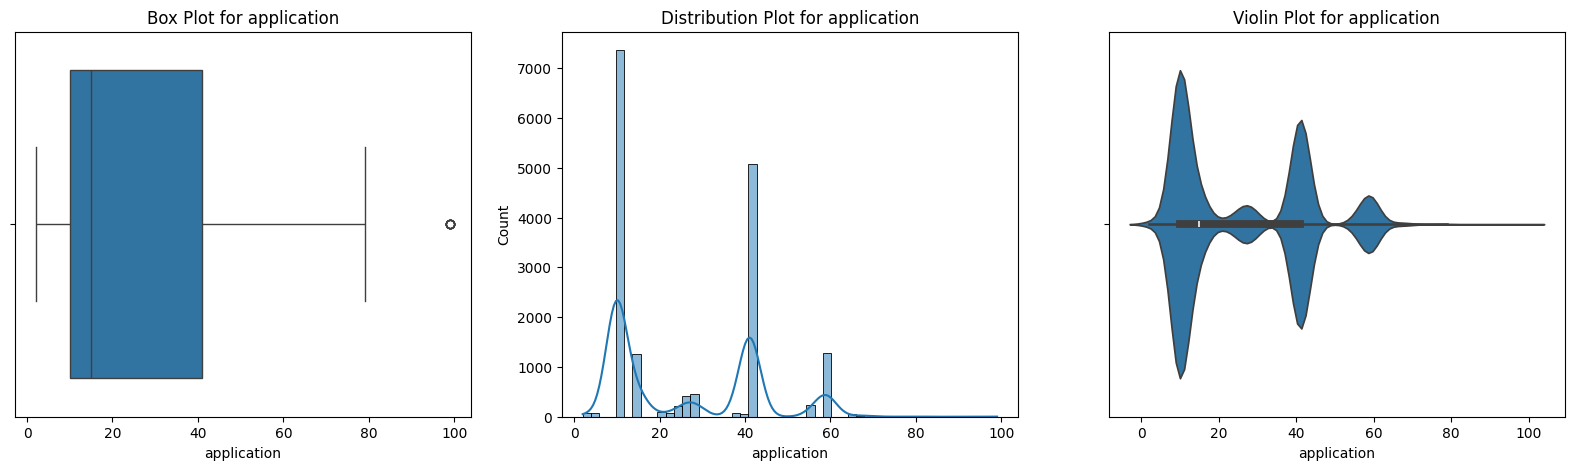

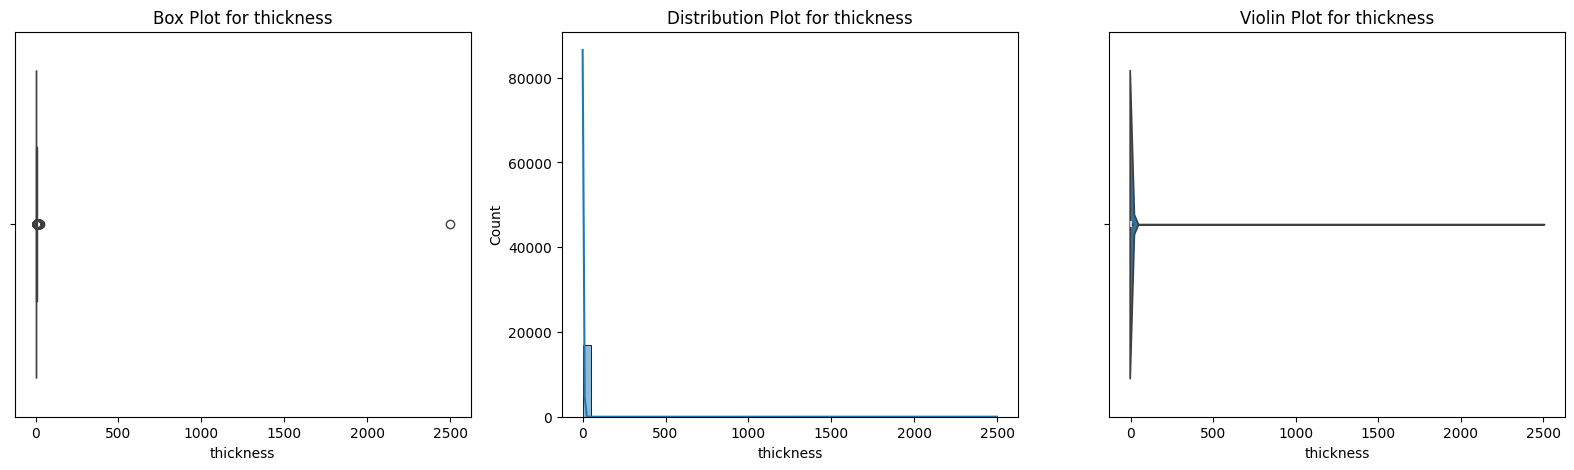

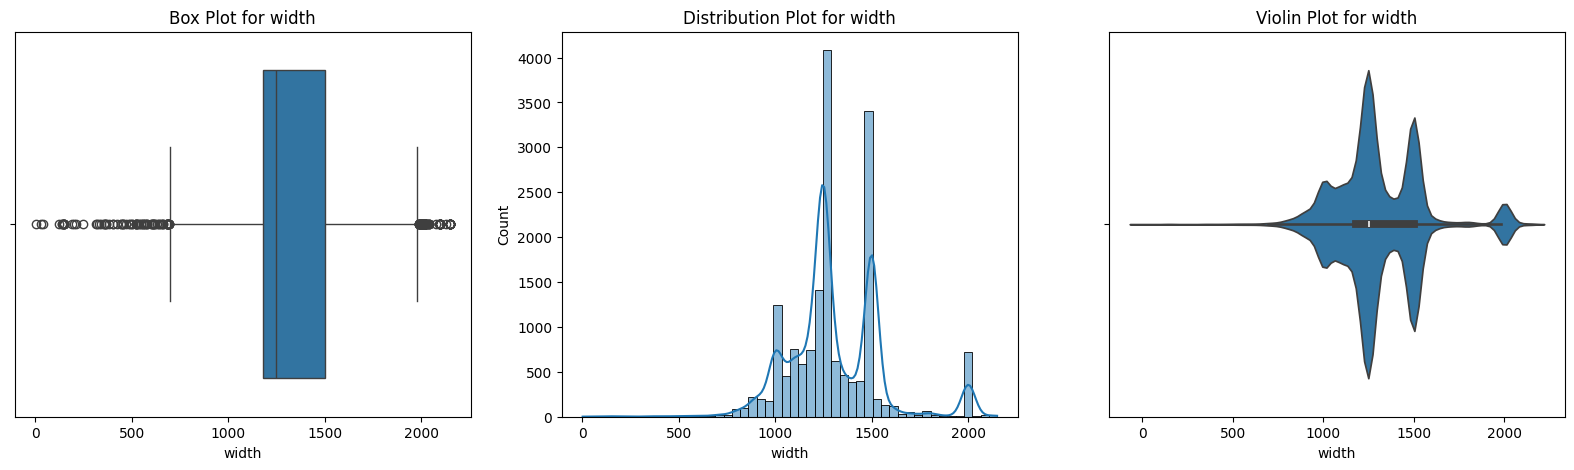

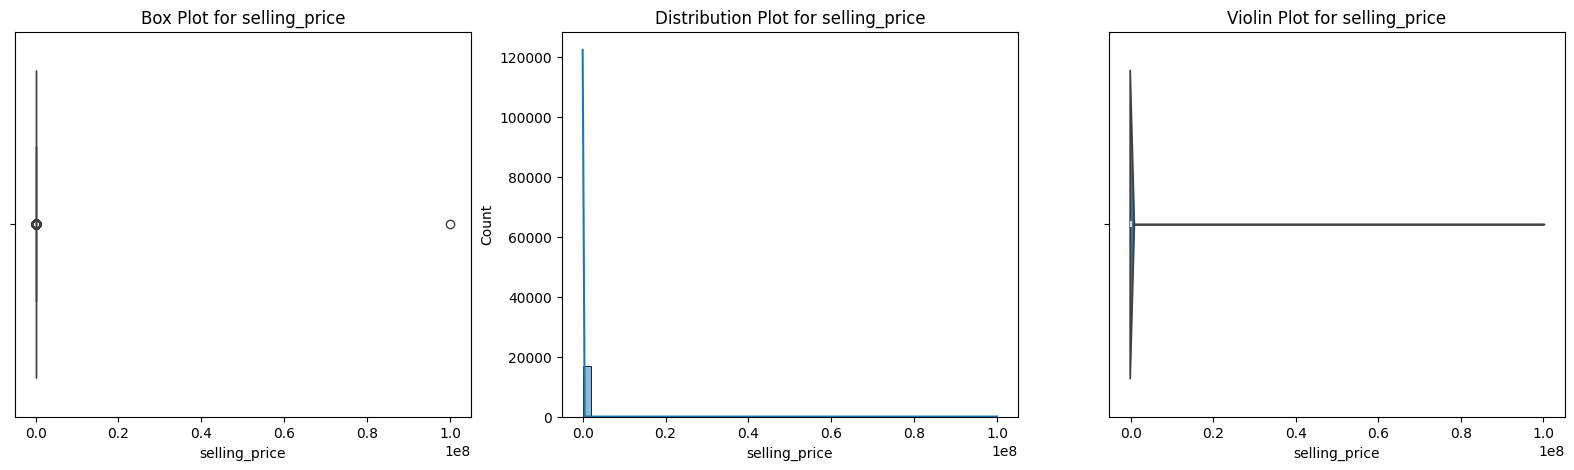

In [16]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [17]:
df1 = df.copy()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,4.0,10.0,2.00,1500.0,1.670799e+09,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,4.0,41.0,0.80,1210.0,1.668702e+09,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,5.0,28.0,0.38,952.0,6.283770e+05,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1.668702e+09,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,4.0,10.0,4.00,2000.0,6.406650e+05,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16851,20210312.0,25.058291,30205825.0,25.0,1,3.0,10.0,1.50,1510.0,1.668702e+09,20210701.0,1006.00,2021-03-12,2021-07-01,3.221205,0.405465,6.913737
16852,20210312.0,94.891116,30393641.0,39.0,0,4.0,10.0,6.80,1255.0,6.406650e+05,20210701.0,964.00,2021-03-12,2021-07-01,4.552730,1.916923,6.871091
16853,20210312.0,56.054345,30218705.0,25.0,1,4.0,41.0,0.55,1240.0,6.119930e+05,20210401.0,1119.00,2021-03-12,2021-04-01,4.026322,-0.597837,7.020191
16854,20210312.0,92.689823,30393641.0,39.0,0,4.0,10.0,11.80,1080.0,6.406650e+05,20210701.0,964.00,2021-03-12,2021-07-01,4.529259,2.468100,6.871091


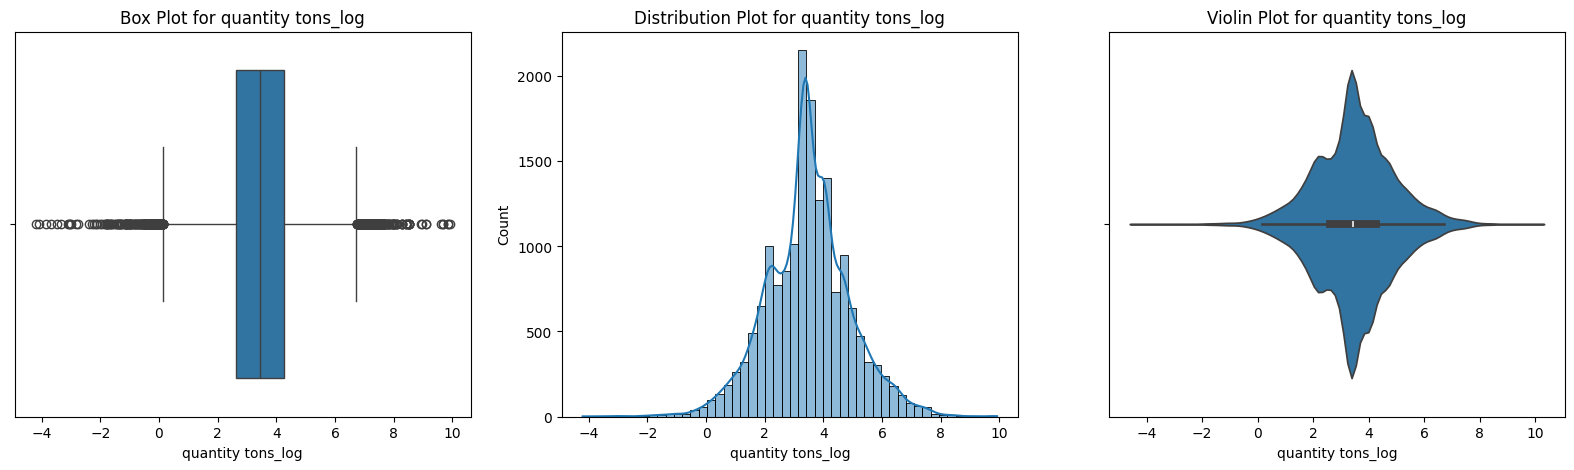

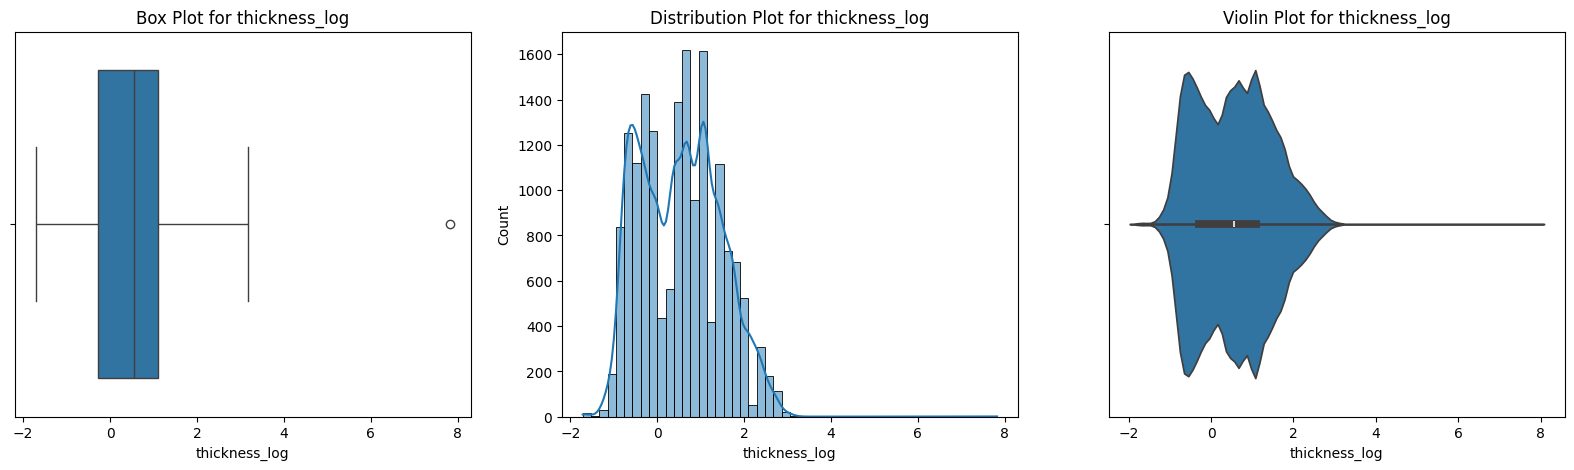

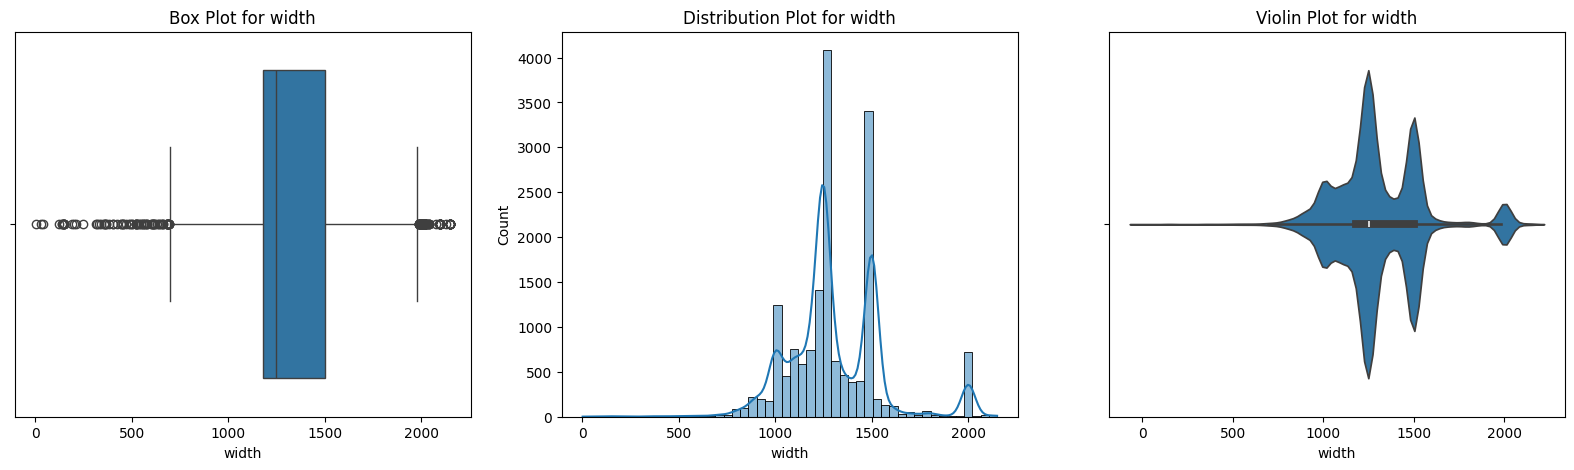

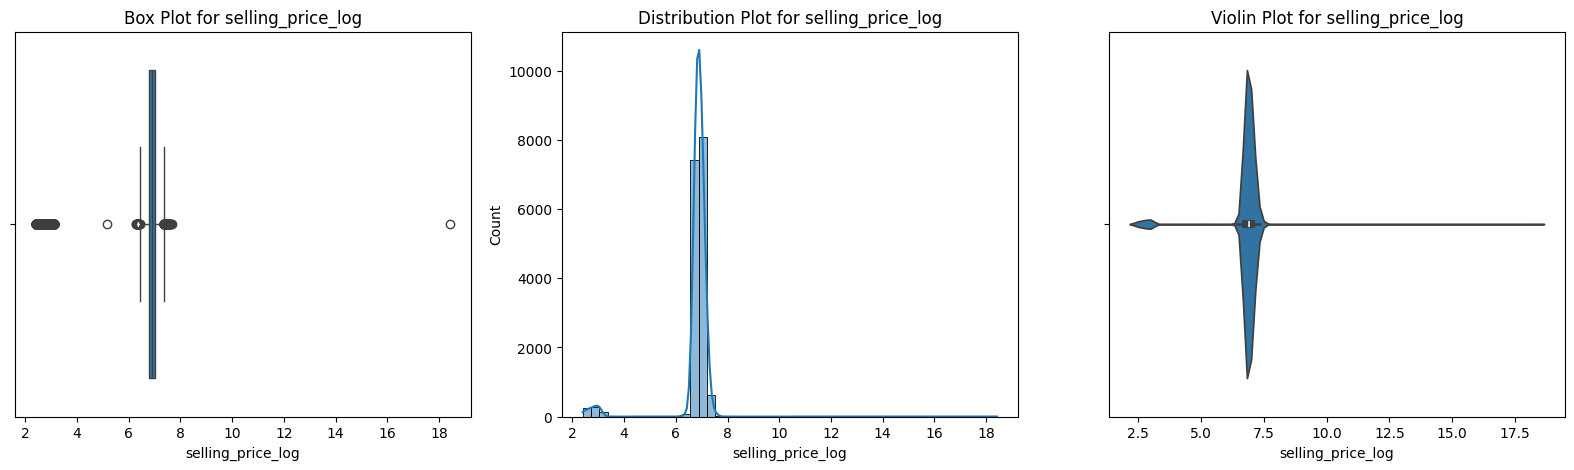

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,4.0,10.0,2.00,1500.0,1.670799e+09,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,4.0,41.0,0.80,1210.0,1.668702e+09,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,5.0,28.0,0.38,952.0,6.283770e+05,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1.668702e+09,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,4.0,10.0,4.00,2000.0,6.406650e+05,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16851,20210312.0,25.058291,30205825.0,25.0,1,3.0,10.0,1.50,1510.0,1.668702e+09,20210701.0,1006.00,2021-03-12,2021-07-01,3.221205,0.405465,6.913737
16852,20210312.0,94.891116,30393641.0,39.0,0,4.0,10.0,6.80,1255.0,6.406650e+05,20210701.0,964.00,2021-03-12,2021-07-01,4.552730,1.916923,6.871091
16853,20210312.0,56.054345,30218705.0,25.0,1,4.0,41.0,0.55,1240.0,6.119930e+05,20210401.0,1119.00,2021-03-12,2021-04-01,4.026322,-0.597837,7.020191
16854,20210312.0,92.689823,30393641.0,39.0,0,4.0,10.0,11.80,1080.0,6.406650e+05,20210701.0,964.00,2021-03-12,2021-07-01,4.529259,2.468100,6.871091


In [18]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)
df2 = df1.copy()
df2

In [19]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

outlier(df2, 'quantity tons_log')
outlier(df2, 'thickness_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,4.0,10.0,2.00,1500.00,1.670799e+09,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,4.0,41.0,0.80,1210.00,1.668702e+09,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,5.0,28.0,0.38,952.00,6.283770e+05,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.00,1.668702e+09,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,4.0,10.0,4.00,1982.25,6.406650e+05,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.446389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16851,20210312.0,25.058291,30205825.0,25.0,1,3.0,10.0,1.50,1510.00,1.668702e+09,20210701.0,1006.00,2021-03-12,2021-07-01,3.221205,0.405465,6.913737
16852,20210312.0,94.891116,30393641.0,39.0,0,4.0,10.0,6.80,1255.00,6.406650e+05,20210701.0,964.00,2021-03-12,2021-07-01,4.552730,1.916923,6.871091
16853,20210312.0,56.054345,30218705.0,25.0,1,4.0,41.0,0.55,1240.00,6.119930e+05,20210401.0,1119.00,2021-03-12,2021-04-01,4.026322,-0.597837,7.020191
16854,20210312.0,92.689823,30393641.0,39.0,0,4.0,10.0,11.80,1080.00,6.406650e+05,20210701.0,964.00,2021-03-12,2021-07-01,4.529259,2.468100,6.871091


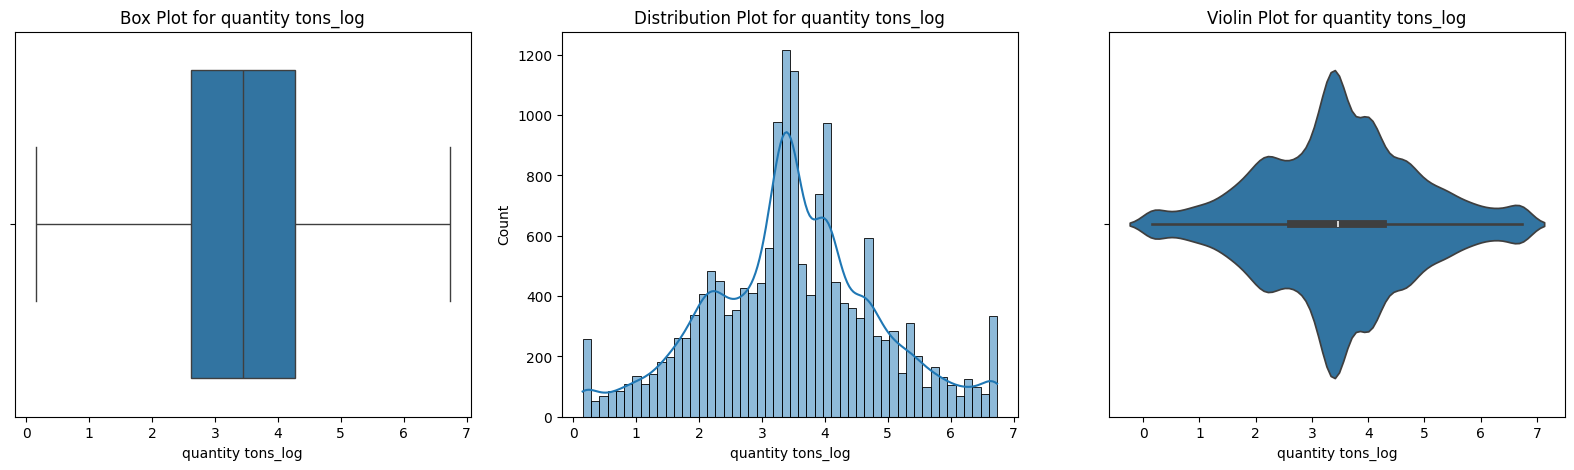

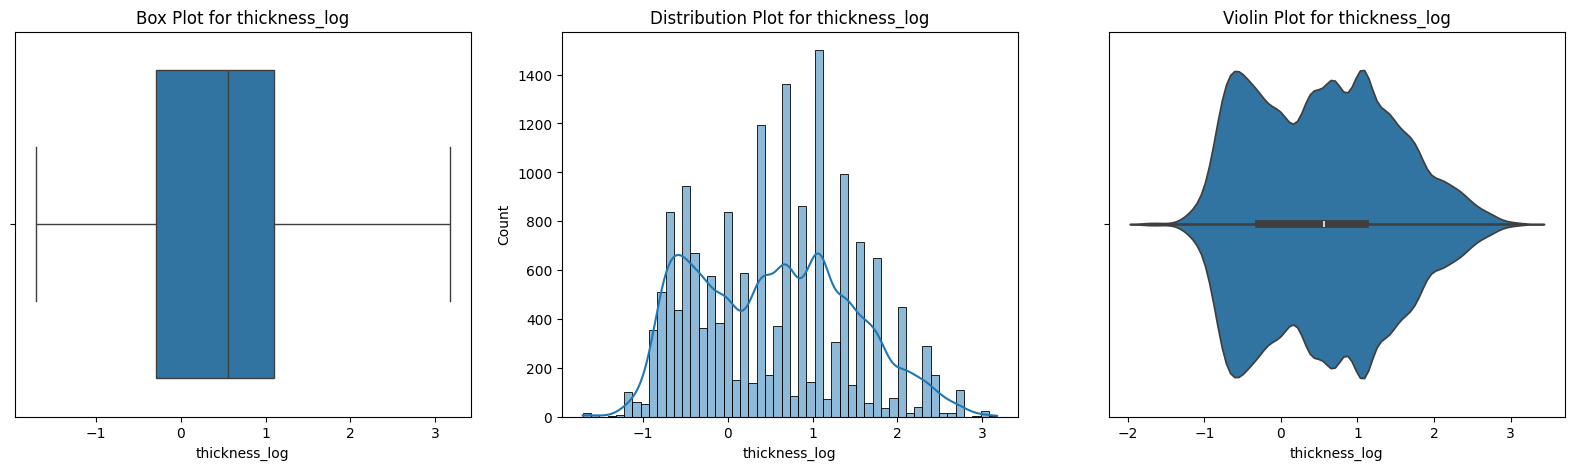

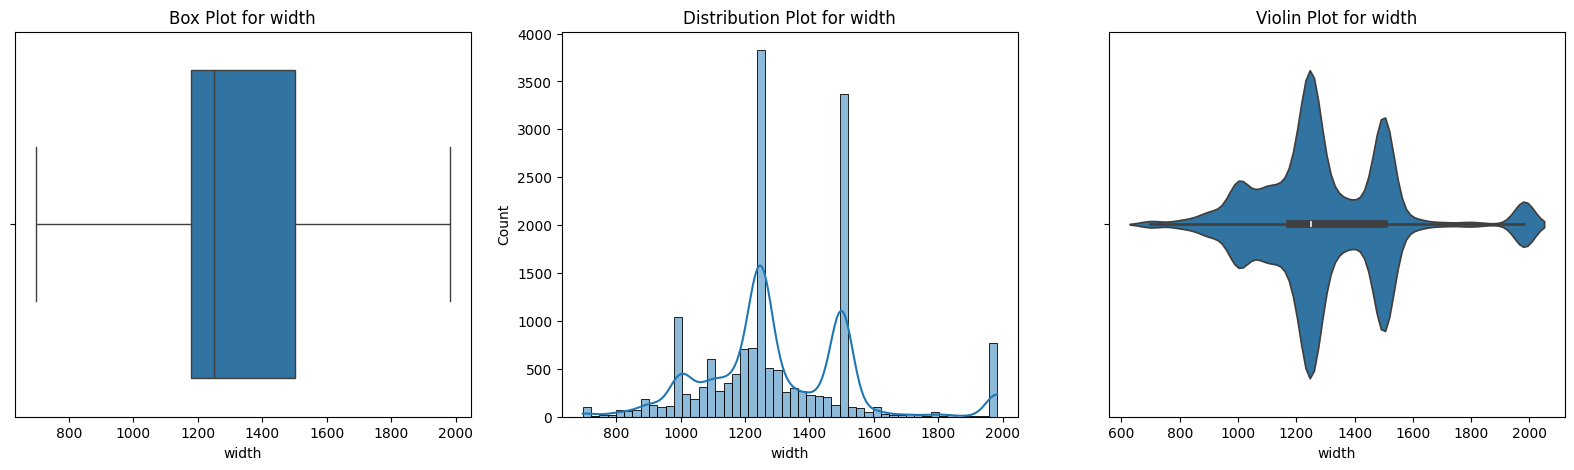

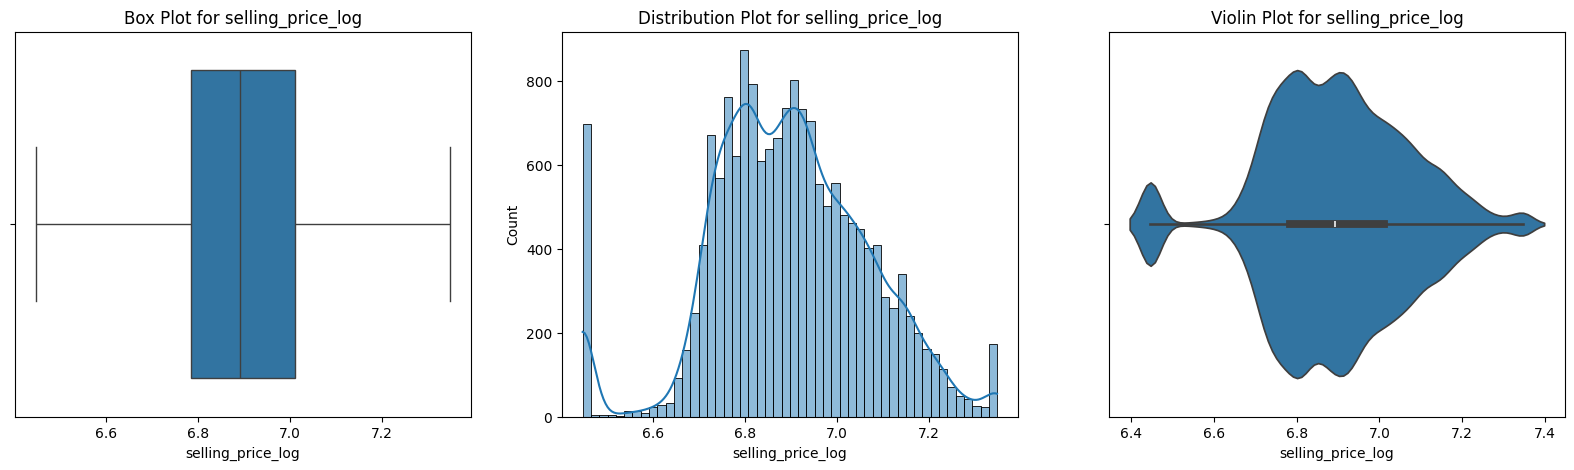

,count,mean,std,min,25%,50%,75%,max
item_date,16856.0,2.021031e+07,2.005174e+03,1.995000e+07,2.021032e+07,2.021032e+07,2.021032e+07,2.021040e+07
quantity tons,16856.0,1.022296e+02,4.346711e+02,1.494114e-02,1.373290e+01,3.162418e+01,7.131267e+01,2.030029e+04
customer,16856.0,3.023652e+07,7.218938e+04,3.014772e+07,3.019726e+07,3.020582e+07,3.028116e+07,3.040772e+07
country,16856.0,4.298636e+01,2.332102e+01,2.500000e+01,2.600000e+01,2.800000e+01,7.700000e+01,1.130000e+02
status,16856.0,1.295622e+00,1.175492e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00
item type,16855.0,3.577870e+00,6.122414e-01,0.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00
application,16856.0,2.588248e+01,1.745957e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,16856.0,2.731695e+00,1.941651e+01,1.800000e-01,7.500000e-01,1.750000e+00,3.000000e+00,2.500000e+03
width,16855.0,1.303066e+03,2.384124e+02,6.962500e+02,1.178500e+03,1.250000e+03,1.500000e+03,1.982250e+03
product_ref,16855.0,5.187498e+08,7.406125e+08,6.117280e+05,6.283770e+05,6.406650e+05,1.668702e+09,1.721130e+09


In [20]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df2, i)
df2.describe().T

In [21]:
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
df3
df3.dtypes

,0
item_date,float64
customer,float64
country,float64
status,int64
item type,float64
application,float64
width,float64
product_ref,float64
delivery date,float64
item_date_1,object


In [22]:
col = ['quantity tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_corelation = df3[col].corr()
df4 = df3.copy()
df4
df_corelation

,quantity tons_log,customer,country,status,application,width,product_ref,thickness_log,selling_price_log
quantity tons_log,1.000000,0.115288,-0.059496,0.004215,0.045246,0.036708,0.096734,0.116571,0.038052
customer,0.115288,1.000000,0.244382,0.048580,-0.036316,0.161725,-0.058211,0.245940,0.000750
country,-0.059496,0.244382,1.000000,-0.034688,-0.098056,0.062567,-0.188572,0.044238,-0.084914
status,0.004215,0.048580,-0.034688,1.000000,0.056936,-0.048528,-0.004597,-0.074484,0.025335
application,0.045246,-0.036316,-0.098056,0.056936,1.000000,-0.172735,-0.141844,-0.158479,0.114992
width,0.036708,0.161725,0.062567,-0.048528,-0.172735,1.000000,-0.031534,0.428183,-0.217745
product_ref,0.096734,-0.058211,-0.188572,-0.004597,-0.141844,-0.031534,1.000000,0.199427,-0.039226
thickness_log,0.116571,0.245940,0.044238,-0.074484,-0.158479,0.428183,0.199427,1.000000,-0.463309
selling_price_log,0.038052,0.000750,-0.084914,0.025335,0.114992,-0.217745,-0.039226,-0.463309,1.000000


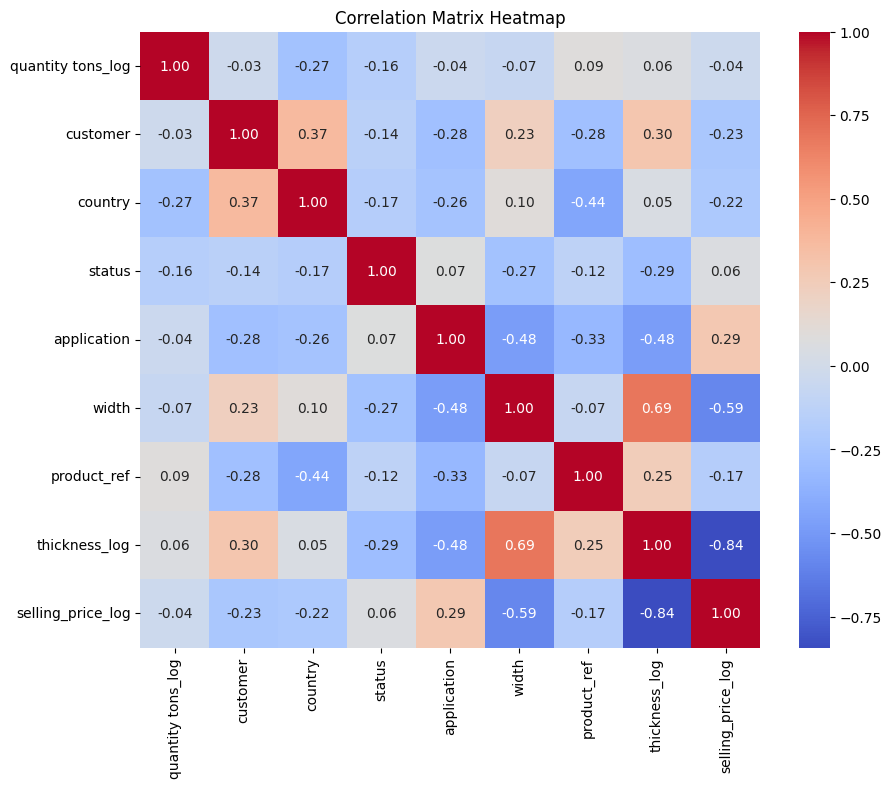

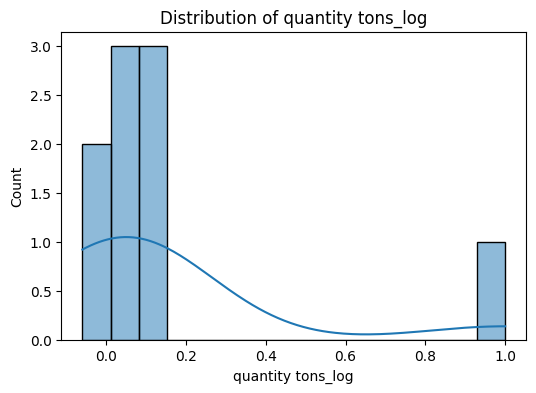

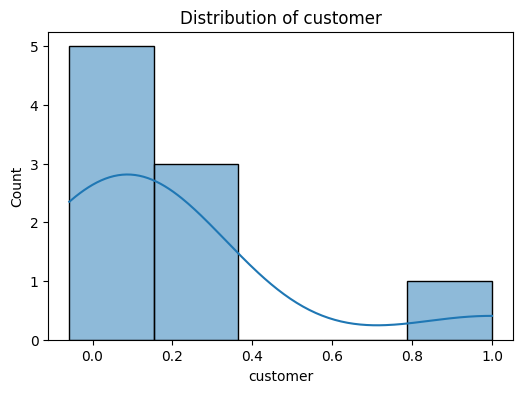

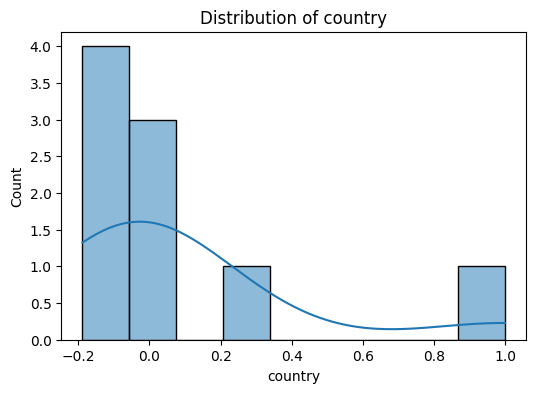

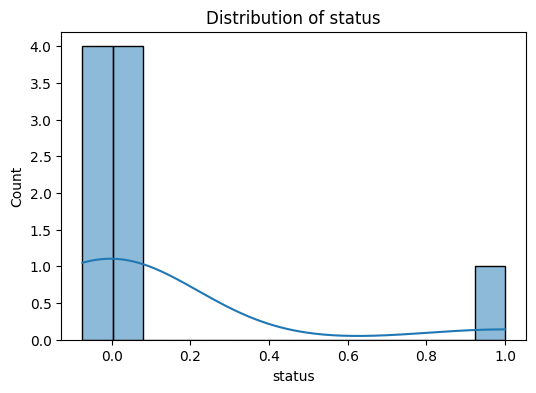

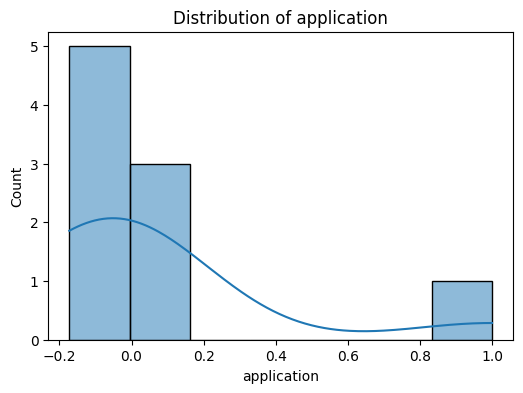

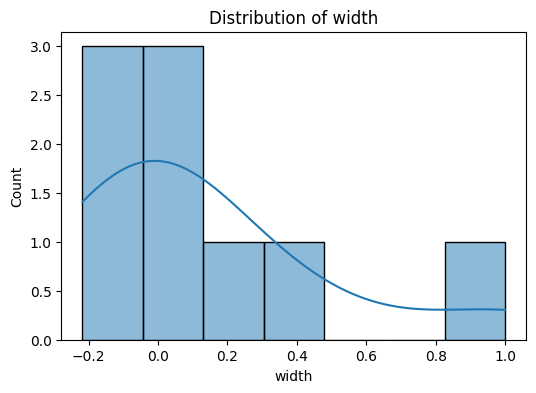

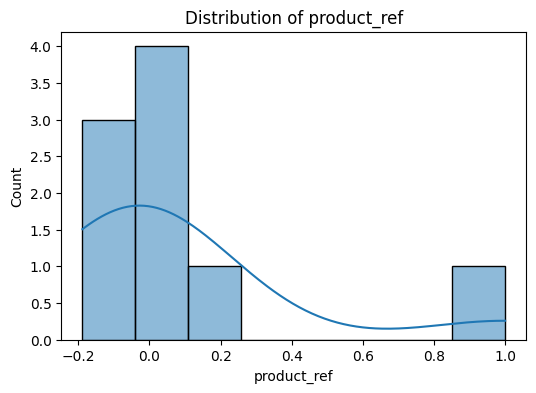

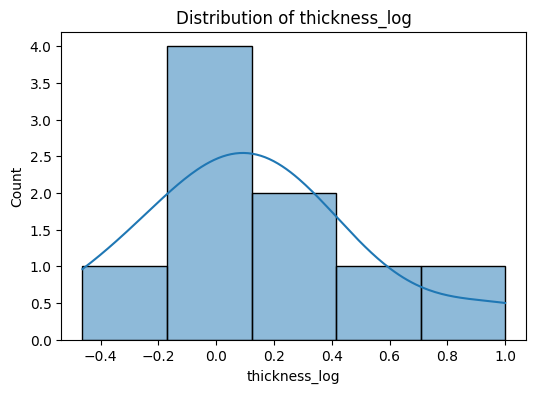

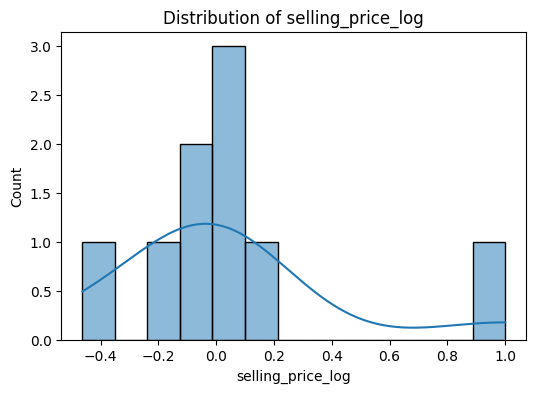

<Figure size 600x400 with 0 Axes>

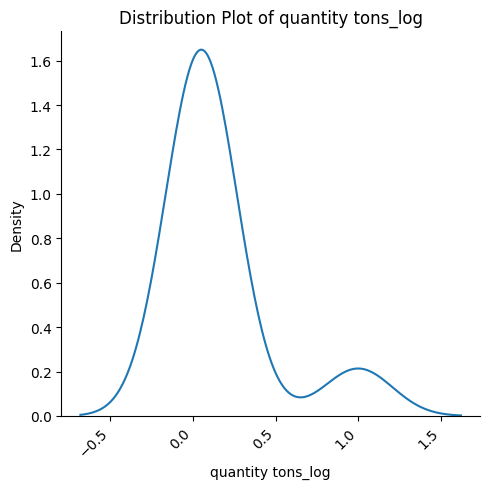

<Figure size 600x400 with 0 Axes>

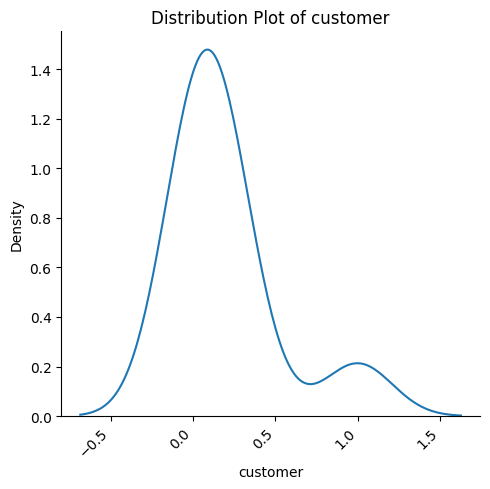

<Figure size 600x400 with 0 Axes>

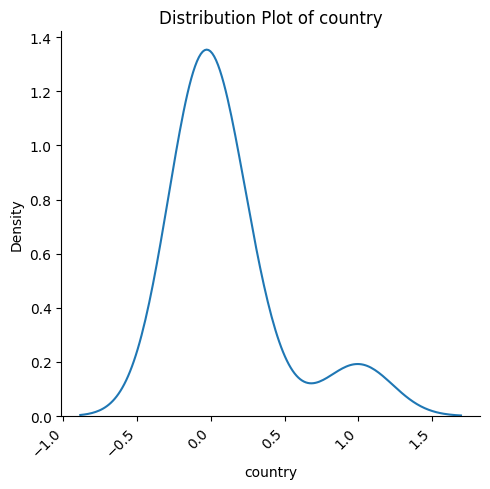

<Figure size 600x400 with 0 Axes>

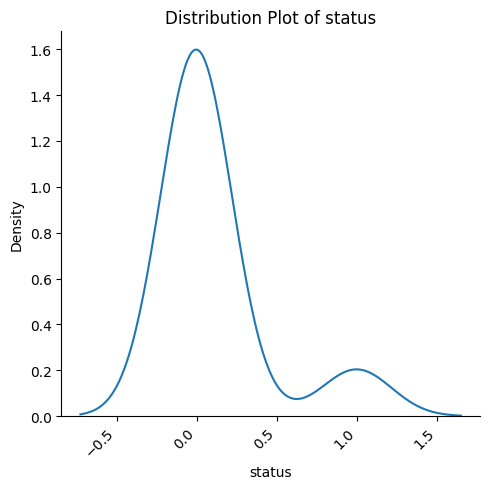

<Figure size 600x400 with 0 Axes>

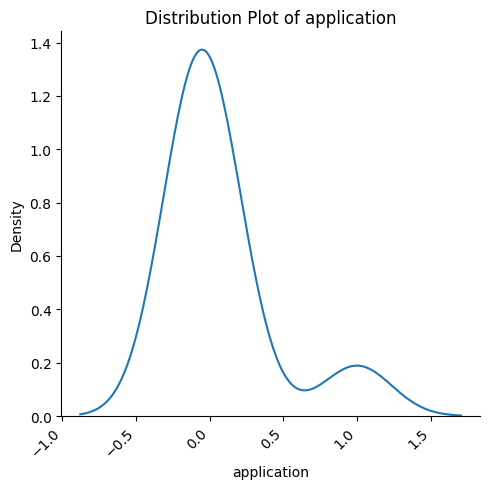

<Figure size 600x400 with 0 Axes>

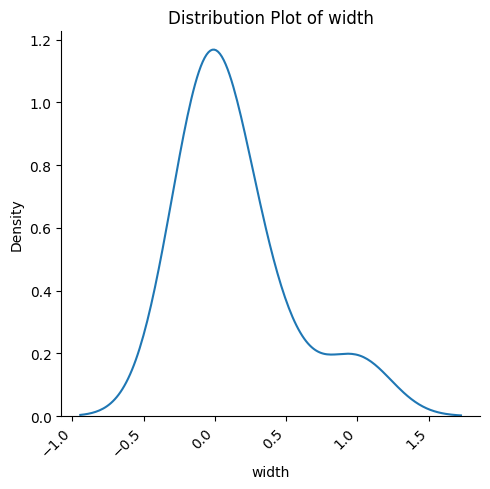

<Figure size 600x400 with 0 Axes>

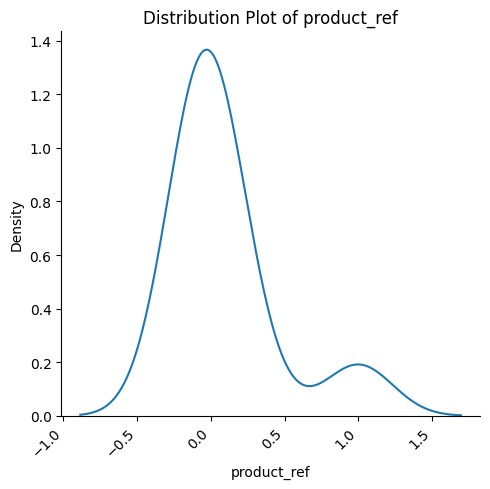

<Figure size 600x400 with 0 Axes>

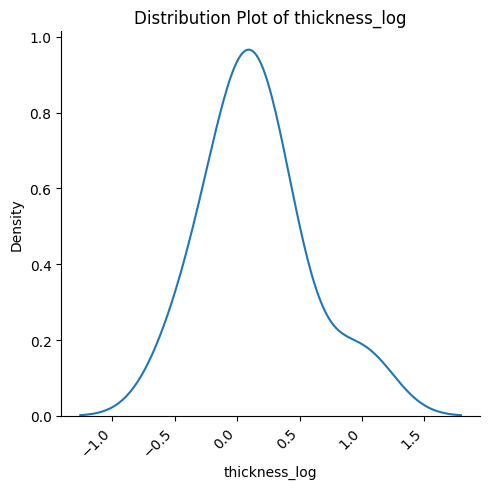

<Figure size 600x400 with 0 Axes>

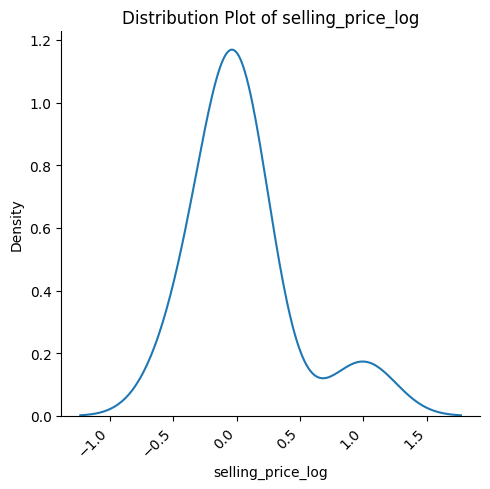

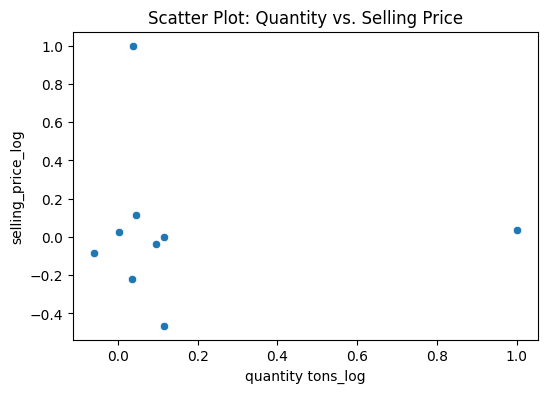

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corelation.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

for column in df_corelation.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_corelation[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

for column in df_corelation.columns:
    plt.figure(figsize=(6, 4))
    sns.displot(x=column, data=df_corelation, kind='kde')

    plt.title(f'Distribution Plot of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='quantity tons_log', y='selling_price_log', data=df_corelation)
plt.title('Scatter Plot: Quantity vs. Selling Price')
plt.show()


In [24]:
df4['Date_difference'] = (df4['delivery date_1'] - df4['item_date_1']).apply(lambda x: x.days)
df4.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference
0,20210401.0,30156308.0,28.0,1,4.0,10.0,1500.00,1.670799e+09,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91
1,20210401.0,30202938.0,25.0,1,4.0,41.0,1210.00,1.668702e+09,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0
2,20210401.0,30153963.0,30.0,1,5.0,28.0,952.00,6.283770e+05,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.00,1.668702e+09,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90
4,20210401.0,30211560.0,28.0,1,4.0,10.0,1982.25,6.406650e+05,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.446389,-31


In [25]:
df4['item_date_1'] = pd.to_datetime(df4['item_date_1'])
df4['item_date_day'] = df4['item_date_1'].dt.day
df4['item_date_month'] = df4['item_date_1'].dt.month
df4['item_date_year'] = df4['item_date_1'].dt.year
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,4.0,10.0,1500.00,1.670799e+09,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,4.0,41.0,1210.00,1.668702e+09,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30153963.0,30.0,1,5.0,28.0,952.00,6.283770e+05,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.00,1.668702e+09,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
4,20210401.0,30211560.0,28.0,1,4.0,10.0,1982.25,6.406650e+05,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.446389,-31,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16851,20210312.0,30205825.0,25.0,1,3.0,10.0,1510.00,1.668702e+09,20210701.0,2021-03-12,2021-07-01,3.221205,0.405465,6.913737,111,12,3,2021
16852,20210312.0,30393641.0,39.0,0,4.0,10.0,1255.00,6.406650e+05,20210701.0,2021-03-12,2021-07-01,4.552730,1.916923,6.871091,111,12,3,2021
16853,20210312.0,30218705.0,25.0,1,4.0,41.0,1240.00,6.119930e+05,20210401.0,2021-03-12,2021-04-01,4.026322,-0.597837,7.020191,20,12,3,2021
16854,20210312.0,30393641.0,39.0,0,4.0,10.0,1080.00,6.406650e+05,20210701.0,2021-03-12,2021-07-01,4.529259,2.468100,6.871091,111,12,3,2021


In [26]:
df_f1 = df4[df4['Date_difference']>=0]
df_f1 = df_f1.reset_index(drop=True)
df_f1
df_f2 = df4[df4['Date_difference']<0]
df_f2 = df_f2.reset_index(drop=True)
df_f2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,5.0,28.0,952.00,6.283770e+05,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.00,1.668702e+09,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
2,20210401.0,30211560.0,28.0,1,4.0,10.0,1982.25,6.406650e+05,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.446389,-31,1,4,2021
3,20210401.0,30342192.0,32.0,1,4.0,41.0,1220.00,6.119930e+05,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,-90,1,4,2021
4,20210401.0,30342192.0,32.0,1,4.0,41.0,1220.00,6.119930e+05,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,-90,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,20210312.0,30401748.0,78.0,1,4.0,41.0,1100.00,6.119930e+05,20210301.0,2021-03-12,2021-03-01,2.041205,-0.693147,6.954639,-11,12,3,2021
266,20210312.0,30401748.0,78.0,1,4.0,41.0,1100.00,6.119930e+05,20210301.0,2021-03-12,2021-03-01,5.332221,-0.510826,6.900731,-11,12,3,2021
267,20210312.0,30401748.0,78.0,1,4.0,41.0,1250.00,6.119930e+05,20210301.0,2021-03-12,2021-03-01,5.022890,-0.510826,6.902743,-11,12,3,2021
268,20210312.0,30401748.0,78.0,1,4.0,41.0,1250.00,6.119930e+05,20210301.0,2021-03-12,2021-03-01,4.393251,-0.510826,6.929517,-11,12,3,2021


In [27]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
df_f1.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery date_1', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'Date_difference', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [28]:
def machine_learning_delivery_date(df, algorithm):

    x = df.drop(columns=['item_date_1', 'delivery date_1', 'Date_difference'], axis=1)
    y = df['Date_difference']

    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    x = imputer.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'Algorithm': str(algorithm).split("'")[1].split(".")[-1],
               'R2': r2,
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

    return metrics

In [29]:
print(machine_learning_delivery_date(df_f1, DecisionTreeRegressor))
print(machine_learning_delivery_date(df_f1, RandomForestRegressor))
print(machine_learning_delivery_date(df_f1, AdaBoostRegressor))
print(machine_learning_delivery_date(df_f1, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.9999995153286896, 'Mean Absolute Error': 0.0009041591320072332, 'Mean Squared Error': 0.0009041591320072332, 'Root Mean Squared Error': 0.030069238966213184}
{'Algorithm': 'RandomForestRegressor', 'R2': 0.9999822097040166, 'Mean Absolute Error': 0.005813743218806499, 'Mean Squared Error': 0.03337356841470764, 'Root Mean Squared Error': 0.18268434091270014}
{'Algorithm': 'AdaBoostRegressor', 'R2': 0.9847649141329634, 'Mean Absolute Error': 4.31266662019217, 'Mean Squared Error': 29.077600915418056, 'Root Mean Squared Error': 5.392365057692038}
{'Algorithm': 'XGBRegressor', 'R2': 0.9968376755714417, 'Mean Absolute Error': 0.044975886230632485, 'Mean Squared Error': 5.7920550963263455, 'Root Mean Squared Error': 2.406668879660504}


In [30]:
def machine_learning_delivery_date(df, algorithm):
  model = RandomForestRegressor().fit(
      df_f1.drop(columns=['item_date_1', 'delivery date_1', 'Date_difference'], axis=1),
      df_f1['Date_difference']
  )
  return model # Return the trained model

model = machine_learning_delivery_date(df_f1, RandomForestRegressor)  # Assign the returned model to a variable

user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1, 4, 2021, 1, 1, 2021]])
y_p = model.predict(user_data) # Now 'model' is defined and accessible
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


In [31]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.8 MB/s eta 0:00:00


In [32]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Load your trained model (replace with your actual model loading logic)
# model = ...

# Define the web page
st.title("Copper Price Prediction")
st.write("Enter the following parameters to predict the copper price:")

# Input fields for user data
quantity_tons_log = st.number_input("Quantity Tons (Log)", value=0.0)
customer = st.number_input("Customer", value=0)
country = st.number_input("Country", value=0)
status = st.number_input("Status", value=0)
application = st.number_input("Application", value=0)
width = st.number_input("Width", value=0)
product_ref = st.number_input("Product Ref", value=0)
thickness_log = st.number_input("Thickness (Log)", value=0.0)
selling_price_log = st.number_input("Selling Price (Log)", value=0.0)
item_date_day = st.number_input("Item Date Day", value=1)
item_date_month = st.number_input("Item Date Month", value=1)
item_date_year = st.number_input("Item Date Year", value=2021)

# Create a button to trigger prediction
if st.button("Predict"):
    # Create input data for prediction
    user_data = np.array([[quantity_tons_log, customer, country, status, application,
                           width, product_ref, thickness_log, selling_price_log,
                           item_date_day, item_date_month, item_date_year]])

    # Make prediction (replace with your actual prediction logic)
    # prediction = model.predict(user_data)[0]

    # Display prediction (replace with your actual prediction display logic)
    # st.write(f"Predicted Delivery Date Difference: {prediction}")

2024-12-12 16:31:43.021 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 16:31:43.171 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-12 16:31:43.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 16:31:43.179 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 16:31:43.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 16:31:43.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 16:31:43.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-12 16:31:43.188 Thread 'MainThread': mi